<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week4/BeverageTimeForProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Another alternative for building time series models at scale.  Based on the research from facebook - [Prophet](https://research.fb.com/prophet-forecasting-at-scale/) - allows the user to quickly produce high quality forecasts with the ability to adjust multiple parameters.
Initial code modeled after Digital Ocean's [tutorial](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3).



In [0]:
#!pip install fbprophet

In [0]:
import timeit

In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# OBTAIN

df = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/On-Campus/master/Dept1.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
df.head()

,Date,Sales,IsHoliday
0,2/5/2010,24924.50,False
1,2/12/2010,46039.49,True
2,2/19/2010,41595.55,False
3,2/26/2010,19403.54,False
4,3/5/2010,21827.90,False


In [6]:
# SCRUB
# Rename zip code column for clarity

df = df.rename(index=str, columns={"Sales": "BevSales"})
df.head()

,Date,BevSales,IsHoliday
0,2/5/2010,24924.50,False
1,2/12/2010,46039.49,True
2,2/19/2010,41595.55,False
3,2/26/2010,19403.54,False
4,3/5/2010,21827.90,False


In [0]:
## SOME BASIC TIME DF MANIPULATION

# remove unwanted cols
# df = df.drop(columns = ['RegionID','City','State','Metro','CountyName','SizeRank'])
# convert zip code to col names
# df = df.set_index('ZipCode')
# transpose time series matrices
# df = df.T
# convert indices to date time
# df.index = pd.to_datetime(df.index)
# df.head()

Prophet limits the naming convention of the input columns to be ds (date) and y (the value) - following code renames columns in the Data Frame - and makes data table [dfs] for each department with given format.

In [8]:
# SCRUB
# Rename columns for prophet

df = df.rename(index=str, columns={"BevSales": "y", "Date": "ds"})
df.head()

,ds,y,IsHoliday
0,2/5/2010,24924.50,False
1,2/12/2010,46039.49,True
2,2/19/2010,41595.55,False
3,2/26/2010,19403.54,False
4,3/5/2010,21827.90,False


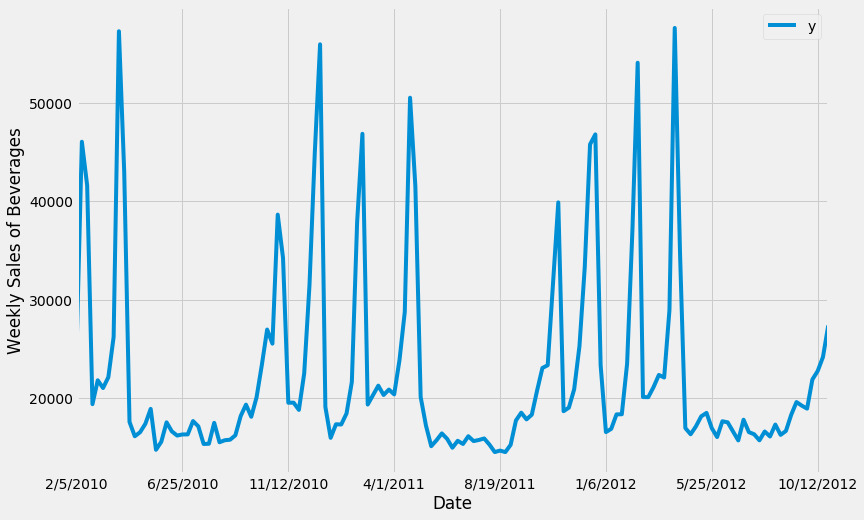

In [9]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Sales of Beverages')
ax.set_xlabel('Date')

plt.show()

In [10]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future_dates = bev_model.make_future_dataframe(periods=13, freq='W')
future_dates.tail()

,ds
151,2012-12-23
152,2012-12-30
153,2013-01-06
154,2013-01-13
155,2013-01-20


In [12]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2012-12-23,41336.019334,30211.819949,52727.148423
152,2012-12-30,31049.829606,19533.736689,42702.055106
153,2013-01-06,19563.776774,7984.127461,30916.892609
154,2013-01-13,12809.841392,1919.696009,25026.184743
155,2013-01-20,13419.484580,1815.417336,25386.925913


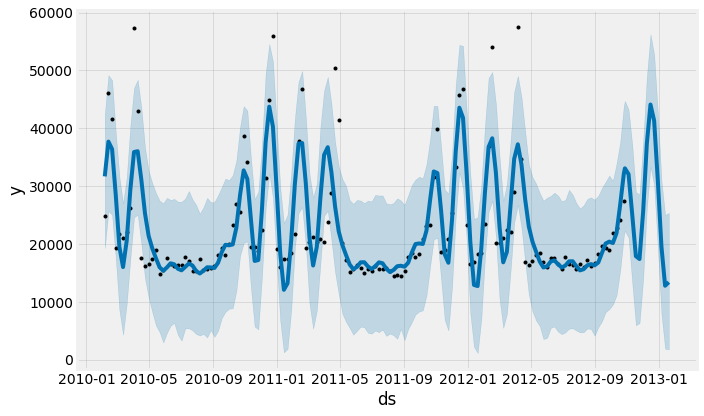

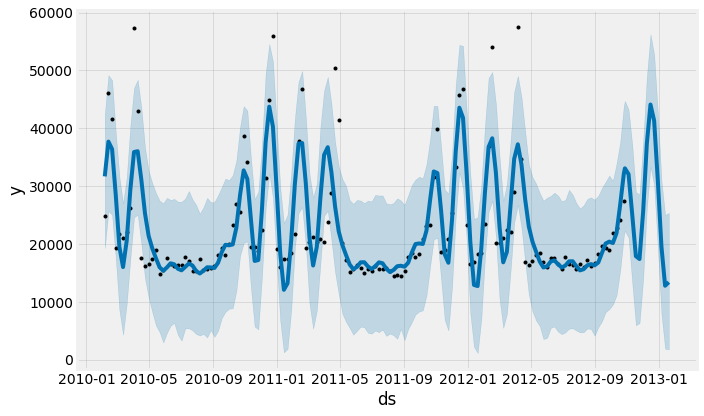

In [13]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

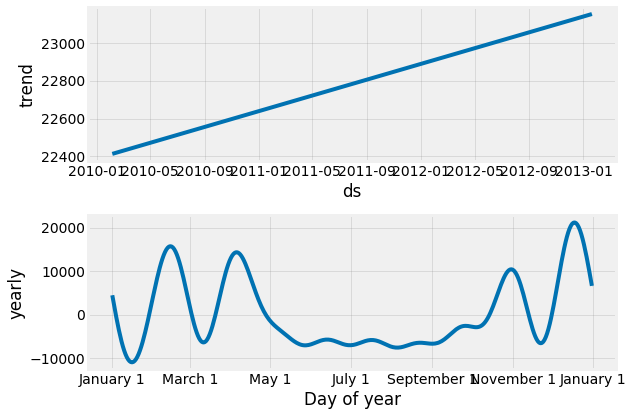

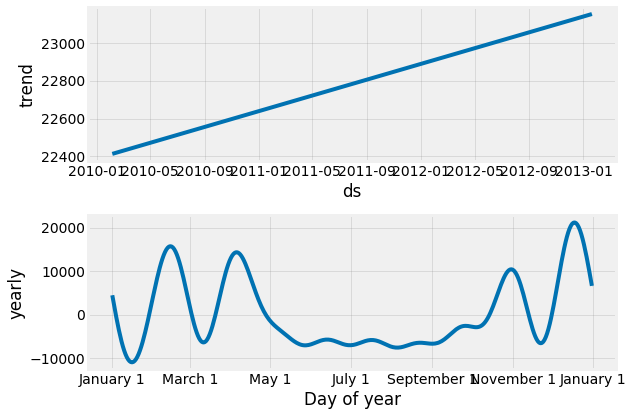

In [14]:
# INTERPRET

bev_model.plot_components(forecast)
